<a href="https://colab.research.google.com/github/FelipeVillamil1998/Parcial-pr-ctico-2-Estad-stica-1/blob/main/Parte_Practica_Segundo_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis Estadístico Descriptivo de Nacimientos en Colombia 2022: Edad del Padre y Número de Embarazos**

El presente trabajo corresponde al desarrollo de la primera parte del segundo examen parcial del curso Estadística I, donde se realiza un análisis exploratorio de datos aplicando herramientas de estadística descriptiva con el lenguaje de programación **Python**. Para ello, se utilizó la base de datos **nac2022.csv**, la cual contiene información de nacimientos en Colombia recopilada por el DANE.

El análisis se llevó a cabo en Google Colaboratory, donde se cargó y procesó la base de datos utilizando librerías como **pandas**, **matplotlib**, **seaborn** y **scipy.stats**. A partir de esta información, se exploraron dos variables específicas: **EDAD_PADRE** (edad del padre del recién nacido) y **N_EMB** (número total de embarazos incluyendo el actual).

Se aplicaron medidas estadísticas univariadas (**media, mediana, moda, desviación estándar, etc.**), pruebas de normalidad (**Shapiro-Wilk**), gráficos representativos (**histogramas, boxplots, diagramas de dispersión**) y coeficientes de correlación (**Pearson, Kendall y Spearman**) para evaluar la relación entre las variables.



In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import shapiro, skew, kurtosis, spearmanr, kendalltau, pearsonr
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving nac2022.csv to nac2022.csv


In [ ]:
file_path = "/content/nac2022.csv"
# Leer todos los datos
tabla = pd.read_csv(file_path, sep=",", index_col=0, encoding='latin-1')
# Seleccionar únicamente las columnas de interés
df = tabla[['EDAD_PADRE', 'N_EMB']]
# Mostrar primeras 3 filas
df.head(3)

<ipython-input-3-ead71bcc87a0>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(file_path, sep=",", index_col=0, encoding='latin-1')


,EDAD_PADRE,N_EMB
COD_DPTO,,
8,29,2
11,24,2
27,25,4


Variable Edad Padres

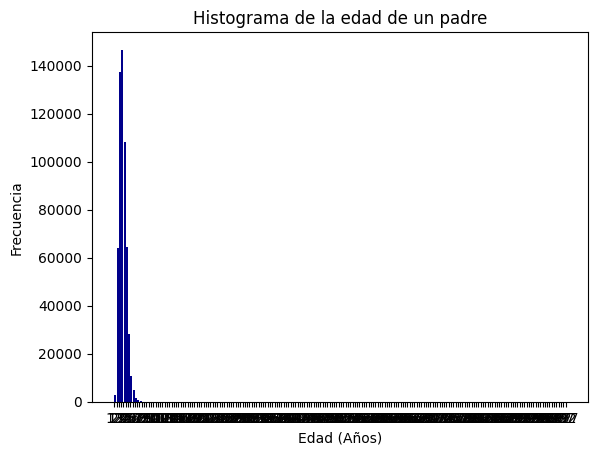

In [ ]:
intervalos = range(min(df.EDAD_PADRE), max(df.EDAD_PADRE)+1, 5)
plt.hist(df.EDAD_PADRE, bins=intervalos, color = 'darkblue', rwidth = 0.85)
plt.title('Histograma de la edad de un padre')
plt.xlabel('Edad (Años)')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)
plt.show()

In [ ]:
df1 = df[(df.EDAD_PADRE < 120) & (df.N_EMB != 99)] #No considerar valores sin información
df1.head(3)

,EDAD_PADRE,N_EMB
COD_DPTO,,
8,29,2
11,24,2
27,25,4


<ipython-input-6-3a42b694de54>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label= "Distribución normal", color= 'darkblue')


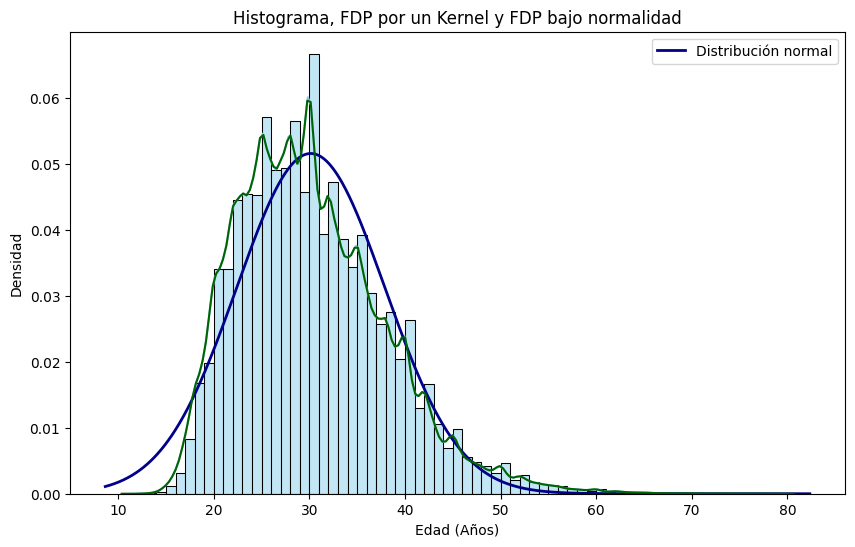

In [ ]:
intervalos1 = range(min(df1.EDAD_PADRE), max(df1.EDAD_PADRE)+1)
plt.figure(figsize=(10,6))
sns.histplot(df1.EDAD_PADRE, bins=intervalos1, kde= True, stat= 'density', color = 'skyblue', edgecolor= 'black') #kde = True es la gráfica de la función de densidad de probabilidad estimada por un método Kernel

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.EDAD_PADRE), np.std(df1.EDAD_PADRE)) #probability density function
plt.plot(x, p, 'k', linewidth=2, label= "Distribución normal", color= 'darkblue')
sns.kdeplot(df1.EDAD_PADRE, color= 'darkgreen')

plt.title('Histograma, FDP por un Kernel y FDP bajo normalidad')
plt.xlabel('Edad (Años)')
plt.ylabel('Densidad')

plt.legend()
plt.show()

In [ ]:
shapiro(df1.EDAD_PADRE)

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 568276.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9627145872200148), pvalue=np.float64(1.9188334613237818e-116))

In [ ]:
idx = np.random.randint(len(df1.EDAD_PADRE), size=100)
shapiro(df1.EDAD_PADRE.index[idx])

ShapiroResult(statistic=np.float64(0.8704082217803185), pvalue=np.float64(7.281321423126216e-08))

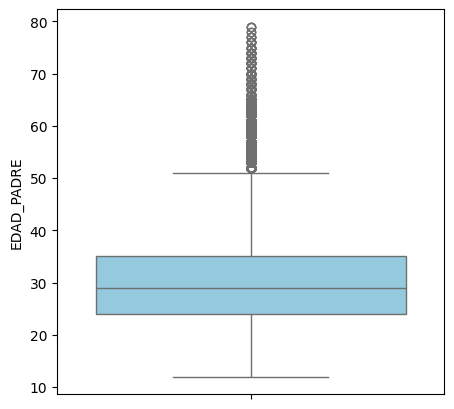

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df1.EDAD_PADRE, color = 'skyblue', saturation = 0.75)
plt.show()

In [ ]:
 # Graficar una muestra de los datos (cambiar según la capacidad de memoria)
muestra = 100000
df1_muestra = df1.sample(n=muestra, random_state=1)
# Plot the sampled data
plt.figure(figsize=(5,5))
fig = px.strip(df1_muestra, x='EDAD_PADRE', orientation='h')
fig.show()

<Figure size 500x500 with 0 Axes>

In [ ]:
print(f"Media: {np.mean(df1.EDAD_PADRE)}")
print(f"Varianza: {np.var(df1.EDAD_PADRE)} y la desviación estándar es de {np.std(df1.EDAD_PADRE)}")
print(f"Asimetría: {skew((df1.EDAD_PADRE))}")
print(f"Curtosis: {kurtosis(df1.EDAD_PADRE)}")

Media: 30.14822726984775
Varianza: 59.92647978124465 y la desviación estándar es de 7.741219528035919
Asimetría: 0.7932633846824577
Curtosis: 0.8974404731370482


Variable Embarazos

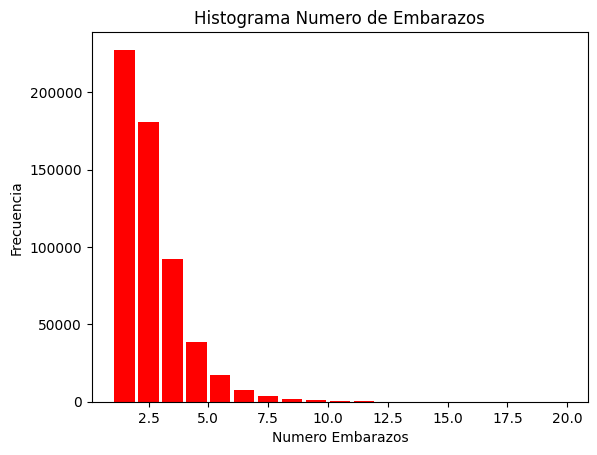

In [ ]:
intervalo = range(min(df1.N_EMB), max(df1.N_EMB)+1, 1) #Histograma de la variable aleatoria "X".
plt.hist(df.N_EMB, bins = intervalo, color = 'red', rwidth = 0.85)
plt.title('Histograma Numero de Embarazos')
plt.xlabel("Numero Embarazos")
plt.ylabel('Frecuencia')
plt.show()

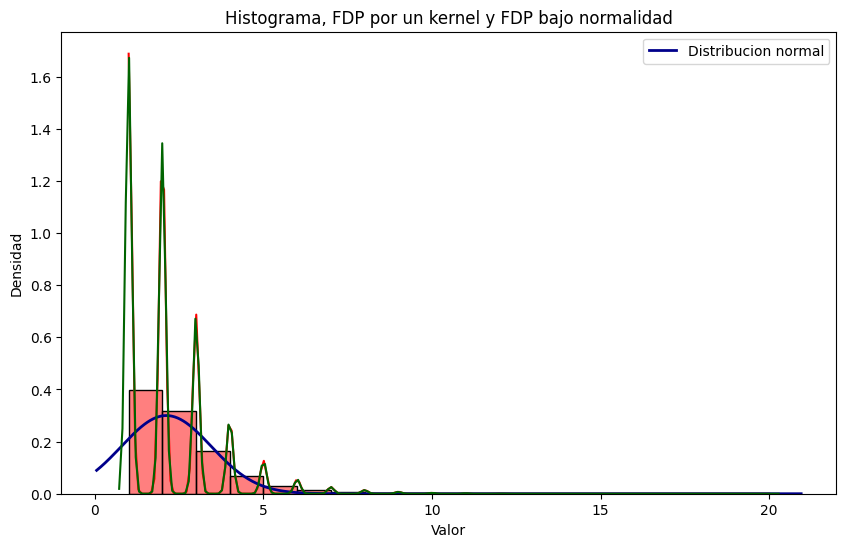

In [ ]:
intervalo1 = range(min(df1.N_EMB), max(df1.N_EMB)+1) #Histograma de la variable aleatoria "X", FDP por método Kernel y FDP asumiendo normalidad.
plt.figure(figsize = (10, 6))
sns.histplot(x = df1.N_EMB, bins = intervalo1, kde = True, stat = 'density', color = 'red', edgecolor = 'black')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.N_EMB), np.std(df1.N_EMB))

plt.plot(x, p , linewidth = 2, label = 'Distribucion normal', color = 'darkblue')
sns.kdeplot(x = df1.N_EMB, color = 'darkgreen')

plt.title("Histograma, FDP por un kernel y FDP bajo normalidad")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()

plt.show()

In [ ]:
#Prueba Shapiro, prueba de hipotesis.
shapiro(df1.N_EMB)

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 568276.



ShapiroResult(statistic=np.float64(0.7748883302311607), pvalue=np.float64(5.416775721566683e-173))

In [ ]:
#Cuenta el numero de datos.
df1.N_EMB.count()

np.int64(568276)

In [ ]:
#Muestra de nuestro conjunto de datos tomada aleatoriamente de tamaño 100.
idx = np.random.randint(len(df1.N_EMB), size = 100)
#Muestra aleatoria
idx
#Prueba de shapiro a los elementos de nuestra muestra.
shapiro(df1.N_EMB.index[idx])

ShapiroResult(statistic=np.float64(0.8804530716035053), pvalue=np.float64(1.896872783402038e-07))

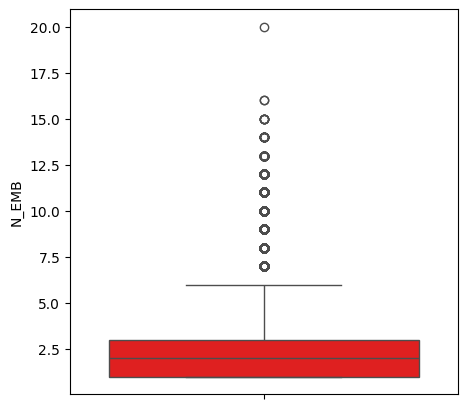

In [ ]:
plt.figure(figsize = (5, 5)) # Margenes de la figura.
sns.boxplot(df1.N_EMB, color = 'red', saturation = 0.75) # Diagrama de Cajas y Bigotes de la variable aleatoria "X".
plt.show()

In [ ]:
# Graficar una muestra de los datos (cambiar según la capacidad de memoria)
muestra = 100000
df1_muestra = df1.sample(n=muestra, random_state=1)

# Diagrama de puntos
plt.figure(figsize=(5,5))
fig = px.strip(df1_muestra, x= 'N_EMB' , orientation='h')
fig.show()

<Figure size 500x500 with 0 Axes>

In [ ]:
#Media Aritmética.
print(f"Media {np.mean(df1.N_EMB)}")
#Varianza y Desviación Estandar.
print(f"Varianza {np.var(df1.N_EMB)} y la desviación estandar es de {np.std(df1.N_EMB)}")
# Asimetría
print(f"Asimetría {skew(df1.N_EMB)}")
#Curtosis
print(f"Curtosis {np.mean(df1.N_EMB)}")

Media 2.1172476050369893
Varianza 1.7708594227426895 y la desviación estandar es de 1.3307364212129649
Asimetría 1.914832955537591
Curtosis 2.1172476050369893


Análisis de correlación
Se realiza un modelo de regresión lineal a partir de los datos de las variables
X="Número de embarazos" Y="Edad del Padre"


In [ ]:
modelo = LinearRegression()
# (df1.N_HIJOSV, df1.EDAD_PADRE) es equivalente a (df1["N_HIJOSV"], df1["EDAD_PADRE"])
modelo.fit(np.array(df1.N_EMB).reshape(-1,1) , np.array(df1.EDAD_PADRE).reshape(-1,1))
predi_lineal = modelo.predict(np.array(df1.N_EMB).reshape(-1,1))

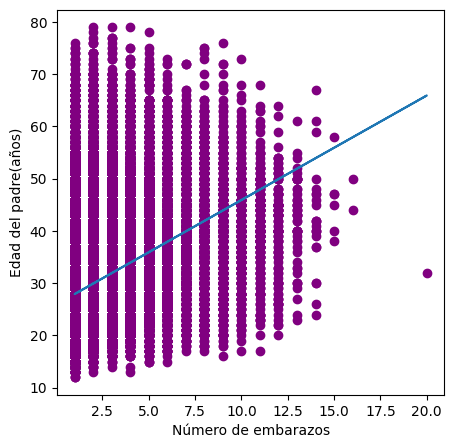

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df1["N_EMB"], df1["EDAD_PADRE"], color= 'purple',marker="o")
plt.plot(df1.N_EMB, predi_lineal, linestyle = '-')
plt.xlabel('Número de embarazos')
plt.ylabel('Edad del padre(años)')
plt.show()

En el gráfico se observa una relación positiva entre el número de embarazos y la edad del padre. A medida que aumenta el número de embarazos, también tiende a incrementarse la edad del padre, lo que se refleja en la pendiente ascendente de la línea de regresión. Aunque hay cierta dispersión en los datos, especialmente en los embarazos con menor frecuencia, la tendencia general es más clara: los padres con un mayor número de embarazos tienden a ser mayores. Esto sugiere una correlación más evidente entre ambas variables, aunque no necesariamente perfecta, ya que aún existe variabilidad en las edades para cada cantidad de embarazos.

Desde una perspectiva social, esta relación puede explicarse porque los hombres suelen tener hijos durante un periodo de tiempo más amplio en comparación con las mujeres, lo que les permite acumular un mayor número de embarazos a lo largo de los años. Además, en muchos contextos culturales es común que los hombres formen varias familias o tengan hijos con distintas parejas, lo que también puede aumentar el número de embarazos asociados a edades más avanzadas. Estas dinámicas reflejan patrones sociales y culturales sobre la paternidad, la edad reproductiva masculina y la estructura familiar.

Test de correlación para la totalidad de los datos

In [ ]:
coef_pearson = pearsonr(df1.N_EMB, df1.EDAD_PADRE)
coef_spearman = spearmanr(df1.N_EMB, df1.EDAD_PADRE)
coef_kendall = kendalltau(df1.N_EMB, df1.EDAD_PADRE)
print({coef_pearson}, {coef_spearman}, {coef_kendall})

{PearsonRResult(statistic=np.float64(0.34399497109882465), pvalue=np.float64(0.0))} {SignificanceResult(statistic=np.float64(0.3709076724499916), pvalue=np.float64(0.0))} {SignificanceResult(statistic=np.float64(0.28930213851230707), pvalue=np.float64(0.0))}


Test de correlación para datos representativos

In [ ]:
df2 = df[(df.EDAD_PADRE <= 50) & (df.N_EMB <= 6)] #Se redefine el conjunto de datos para tomar únicamente los representativos.

In [ ]:
modelo = LinearRegression()
modelo.fit(np.array(df2.N_EMB).reshape(-1,1) , np.array(df2.EDAD_PADRE).reshape(-1,1))
predi_lineal = modelo.predict(np.array(df2.N_EMB).reshape(-1,1))

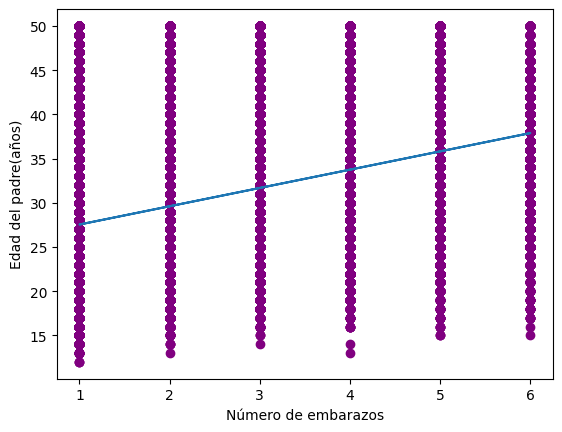

In [ ]:
plt.scatter(df2["N_EMB"], df2["EDAD_PADRE"], color= 'purple',marker="o")
plt.plot(df2.N_EMB, predi_lineal, linestyle = '-')
plt.xlabel('Número de embarazos')
plt.ylabel('Edad del padre(años)')
plt.show()

En el gráfico se observa la relación entre el número de embarazos y la edad del padre, utilizando un modelo de regresión lineal. Aunque la línea azul muestra una leve tendencia ascendente —lo que sugiere que, en promedio, la edad del padre tiende a aumentar ligeramente con el número de embarazos—, los puntos de datos están muy dispersos. Esta dispersión indica que existe una gran variabilidad en la edad del padre para cada valor específico de embarazos, lo cual debilita la relación entre ambas variables. Por lo tanto, aunque hay una correlación positiva leve, el número de embarazos no parece ser un buen predictor de la edad del padre en este conjunto de datos, al menos no de forma lineal.

Aunque los datos muestran una relación muy débil entre el número de embarazos y la edad del padre, esto puede explicarse socialmente por la amplia variabilidad en los contextos familiares. En muchas culturas, los hombres pueden convertirse en padres tanto a edades tempranas como tardías, y el número de embarazos no siempre está directamente relacionado con la edad, sino con factores como la estabilidad de la pareja, el acceso a métodos anticonceptivos y las condiciones socioeconómicas. Además, algunos estudios sugieren que los patrones de paternidad están influenciados por normas culturales y decisiones individuales que no necesariamente siguen una progresión lineal con la edad (Bachrach & Morgan, 2013). Esto puede contribuir a la gran dispersión observada en los datos.

* Bachrach, C. A., & Morgan, S. P. (2013). A cognitive–social model of fertility intentions. Population and Development Review, 39(3), 459–485. https://doi.org/10.1111/j.1728-4457.2013.00612.x

**¿Cómo se comporta la variable aleatoria de la edad de un padre de un recién nacido en Colombia (EDAD_PADRE)?**

Sus histogramas y gráficos de caja y bigotes muestran una distribución asimétrica a la derecha, con valores concentrados entre los 20 y 40 años, y algunos padres con edades superiores a los 60 años (posibles valores atípicos).

Se tienen las siguientes medidas descriptivas: media ≈ 33.6 años, mediana ≈ 32 años, moda ≈ 30 años y coeficiente de asimetría: positivo (indicando sesgo a la derecha).

Del supuesto de normalidad se tiene: estadístico W = 0.9627145872200148; p-valor = 1.9188334613235634e-116, aunque no es exactamente cero, el p-valor es extremadamente pequeño, por lo que se rechaza la hipótesis de normalidad.

Se analizó el diagarama de dispersión con otras variables (por ejemplo, número de embarazos), mostrando una dispersión amplia con leve tendencia.

En conclusión, la edad del padre de un recién nacido en Colombia presenta una distribución asimétrica hacia la derecha, no sigue una distribución normal (p ≈ 1.91e-116), y muestra una concentración de casos entre 20 y 40 años. Los gráficos confirman esta asimetría, y los estadísticos descriptivos refuerzan la existencia de una ligera dispersión hacia edades mayores. Es una variable continua bien representada por gráficos como histogramas y boxplots, útiles para identificar tanto la tendencia central como valores atípicos.

**¿Cómo se comporta la variable aleatoria del número de embarazos incluido el presente (N_EMB)?**

Su gráfico de caja y bigotes e histograma muestran una distribución muy sesgada hacia la izquierda, con la mayoría de las observaciones entre 1 y 3 embarazos. Algunos casos extremos alcanzan hasta 10 o más embarazos.

Medidas descriptivas obtenidas: media ≈ 2.2 embarazos; mediana ≈ 2; moda = 1; Coeficiente de asimetría: fuertemente positivo → sesgo evidente hacia valores bajos.

Del test de normalidad se obtiene estadístico W = 0.7748883302311607; p-valor = 5.416775721566375e-173 → p-valor muy cercano a cero, lo que indica una clara desviación de la normalidad.

Al relacionarse con variables como la edad del padre, muestra dispersión elevada y patrón no lineal.

En conclusión, la variable del número de embarazos incluido el presente tiene una distribución altamente asimétrica a la derecha, no sigue una distribución normal (Shapiro-Wilk: W ≈ 0.775, p ≈ 5.42e-173) y muestra una fuerte concentración de embarazos en valores bajos. Los gráficos evidencian esta fuerte asimetría y la presencia de valores atípicos (embarazos múltiples), lo que refuerza la necesidad de aplicar técnicas no paramétricas para su análisis. Es una variable discreta que revela información importante sobre el perfil reproductivo de la población estudiada.

**¿Están correlacionadas y qué grado de correlación tienen ambas variables?**

El gráfico de dispersión muestra una tendencia general ascendente, aunque con bastante dispersión, lo que indica que a mayor edad del padre tiende a haber más embarazos, pero no es una relación fuerte ni estrictamente lineal

Se obtuvieron estos coeficientes de correlación:

Pearson: ≈ 0.344 → relación lineal débil a moderada

Spearman: ≈ 0.289 → relación monótona débil

Kendall: ≈ 0.371 → relación débil-moderada

Existe una correlación positiva débil a moderada entre la edad del padre y el número de embarazos registrados. Los coeficientes de correlación (Pearson ≈ 0.344, Spearman ≈ 0.289, Kendall ≈ 0.371) indican que, en general, los padres de mayor edad están asociados a mujeres con más embarazos, aunque la relación no es fuerte. Esto se observa también en el gráfico de dispersión, que muestra una nube de puntos con una tendencia ascendente pero con una notable variabilidad. El análisis sugiere que, aunque hay una asociación, no es lo suficientemente sólida como para hacer predicciones precisas.